<a href="https://colab.research.google.com/github/tjwatt15/Baseball/blob/master/RISP_byPlayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RISP Analysis

A frequent source of headaches for players and fans alike is how a player or team tends to do with Runners in Scoring Position (RISP). The short code below allows a user to examine the outcomes over a given period of time for a given player on a given team with and without RISP.

In [3]:
!pip install pybaseball

  Created wheel for pybaseball: filename=pybaseball-1.0.8-cp36-none-any.whl size=36008 sha256=7031bbcfaad170732d7f5a0676bd020512a1129471cad6413aa30e8c986d12cb
  Stored in directory: /root/.cache/pip/wheels/d5/7b/fb/b1f8a38eb135628a747627977fd18d13ce2c210cffa08ee5a5
Successfully built pybaseball


#Import packages and set initial variables

In [6]:
from pybaseball import statcast
from pybaseball import playerid_reverse_lookup
from datetime import datetime
import pandas as pd
import numpy as np

def hasNumbers(inputString):
     return any(char.isdigit() for char in inputString)

valid_teams = ['MIN', 'PHI', 'BAL', 'NYY', 'LAD', 'OAK', 'SEA', 'TB', 'MIL', 'MIA', 'KC', 'TEX', 'CHC', 'ATL', 'COL', 'HOU', 'CIN', 'LAA', 'DET', 'TOR', 'PIT', 'NYM', 'CLE', 'CWS', 'STL', 'WSH', 'SF', 'SD', 'BOS', 'ARI', 'ANA', 'WAS']

#Choose a team
chosen_team = input("Choose your team. Use the three-letter code (e.g. 'LAD', 'CLE', 'BOS', 'HOU'): ")

if chosen_team.upper() not in valid_teams == True:
  raise Exception('Please select a valid team abbreviation.')
else:
  chosen_team = chosen_team.upper()

#Choose Statcast retrieval start date
start_date = pd.to_datetime(input("What date would you like to start from? Please use yyyy-mm-dd format: "))

if start_date == '':
  raise Exception('Please enter a start date for Statcast.')

#Choose Statcast retrieval end date
end_date = pd.to_datetime(input("What date would you like to end? Please use yyyy-mm-dd format.\nIf you would only like one data from one day, please leave this blank: "))

#Get dates into proper format
end_date = end_date.strftime('%Y-%m-%d')
start_date = start_date.strftime('%Y-%m-%d')

if end_date == '':
  end_date = None
elif end_date < start_date:
  raise Exception('The end date cannot be before the start date.')
elif end_date == start_date:
  end_date = None

#Choose game type
valid_game_types = ['R','S','P']
game_type_ = input("Choose only one game status: 'R' for regular season, 'P' for playoffs, or 'S' for Spring Training: ")

if game_type_.upper() not in valid_game_types == True:
  raise Exception('Please enter a valid game status: "R" for regular season, "P" for playoffs, or "S" for Spring Training.')
else:
  game_type_ = game_type_.upper()

Choose your team. Use the three-letter code (e.g. 'LAD', 'CLE', 'BOS', 'HOU'): cle
What date would you like to start from? Please use yyyy-mm-dd format: 2017-03-01
What date would you like to end? Please use yyyy-mm-dd format.
If you would only like one data from one day, please leave this blank: 2019-08-10
Choose only one game status: 'R' for regular season, 'P' for playoffs, or 'S' for Spring Training: R


#Get the data from FanGraphs

In [7]:
#Get team's game stats
game_statcast = statcast(start_dt = f'{start_date}', end_dt = f'{end_date}')
game_statcast = game_statcast[['game_date'
                              ,'game_type'
                              ,'pitch_name'
                              ,'release_speed'
                              ,'player_name'
                              ,'batter'
                              ,'events'
                              ,'babip_value'
                              ,'description'
                              ,'zone'
                              ,'stand'
                              ,'p_throws'
                              ,'home_team'
                              ,'away_team'
                              ,'type'
                              ,'bb_type'
                              ,'balls'
                              ,'strikes'
                              ,'plate_x'
                              ,'plate_z'
                              ,'on_3b'
                              ,'on_2b'
                              ,'on_1b'
                              ,'outs_when_up'
                              ,'inning'
                              ,'inning_topbot']]



This is a large query, it may take a moment to complete
Skipping offseason dates
Query unsuccessful for data from 2018-03-15 to 2018-03-20. Skipping these dates.
Query unsuccessful for data from 2018-03-21 to 2018-03-21. Skipping these dates.
Query unsuccessful for data from 2018-03-22 to 2018-03-26. Skipping these dates.
Query unsuccessful for data from 2018-03-27 to 2018-03-27. Skipping these dates.
Completed sub-query from 2018-03-28 to 2018-04-02
Completed sub-query from 2018-04-03 to 2018-04-08
Completed sub-query from 2018-04-09 to 2018-04-14
Completed sub-query from 2018-04-15 to 2018-04-20
Completed sub-query from 2018-04-21 to 2018-04-26
Completed sub-query from 2018-04-27 to 2018-05-02
Completed sub-query from 2018-05-03 to 2018-05-08
Completed sub-query from 2018-05-09 to 2018-05-14
Completed sub-query from 2018-05-15 to 2018-05-20
Completed sub-query from 2018-05-21 to 2018-05-26
Completed sub-query from 2018-05-27 to 2018-06-01
Completed sub-query from 2018-06-02 to 2018-0

#Create a binary variable for RISP

In [0]:
#Make runners on base into a boolean value
for i in ['on_1b','on_2b','on_3b']: 
  game_statcast[f'{i}'] = game_statcast[f'{i}'].fillna(0)
  remove_list = list(game_statcast[f'{i}'].unique())
  remove_list.remove(0.)
  game_statcast[f'{i}'] = game_statcast[f'{i}'].replace(remove_list, 1)
  game_statcast[f'{i}'] = game_statcast[f'{i}'].astype('bool')

In [0]:
#Make RISP a boolean field
game_statcast['risp'] = np.where((game_statcast['on_3b']== 1) | (game_statcast['on_2b'] == 1), True, False)

In [10]:
batter_list = list(game_statcast['batter'].unique())
team_batters = playerid_reverse_lookup(batter_list, key_type='mlbam')
team_batters = team_batters[['name_last','name_first','key_mlbam']]
team_batters.columns = ['batter_last','batter_first','key_mlbam']

game_statcast = pd.merge(game_statcast, team_batters, left_on = 'batter', right_on = 'key_mlbam', how = 'left')
game_statcast = game_statcast.drop(['key_mlbam'], axis = 1)

Gathering player lookup table. This may take a moment.


##Check pitching differences with RISP for given player.

In [11]:
def hasNumbers(inputString):
     return any(char.isdigit() for char in inputString)
  
player1_first = input('Please enter the batter\'s first name: ').lower()
if hasNumbers(player1_first) == True:
  raise Exception("The first name is not case-sensitive, but should not contain any numbers.")

player1_last = input('Please enter the batter\'s last name: ').lower()
if hasNumbers(player1_last) == True:
  raise Exception("The last name is not case-sensitive, but should not contain any numbers.")
  
player1 = game_statcast.query(f'batter_last == "{player1_last}" & batter_first == "{player1_first}"')



player1_speed = player1[['pitch_name','release_speed','risp']].groupby(by= ['pitch_name','risp']).mean().sort_values(['risp','release_speed'], ascending=False).reset_index()
player1_count = player1[['pitch_name','risp','batter_last']].groupby(by=['risp','pitch_name']).count().sort_values(['risp','batter_last'], ascending=False).reset_index()

player1_risp = pd.merge(player1_speed, player1_count, left_on = ['risp','pitch_name'], right_on = ['risp','pitch_name'], how = 'inner')
player1_risp.columns = ['pitch_name','risp','release_speed','num_pitches_faced']
player1_risp['batter'] = player1_first + ' ' + player1_last
player1_risp = player1_risp.sort_values(['risp','num_pitches_faced'], ascending=True)
player1_risp

Please enter the batter's first name: francisco
Please enter the batter's last name: lindor


,pitch_name,risp,release_speed,num_pitches_faced,batter
18,Pitch Out,False,80.300000,1,francisco lindor
20,Eephus,False,69.700000,3,francisco lindor
15,Split Finger,False,84.670769,65,francisco lindor
17,Knuckle Curve,False,81.191463,82,francisco lindor
13,Cutter,False,88.925000,192,francisco lindor
12,Sinker,False,91.774178,213,francisco lindor
19,Curveball,False,77.876246,357,francisco lindor
16,Slider,False,84.525536,466,francisco lindor
14,Changeup,False,84.694316,475,francisco lindor
11,2-Seam Fastball,False,92.435340,515,francisco lindor


In [12]:
player1_risp_outcome = player1[pd.notnull(player1['events'])]

out_events = ['field_out','strikeout','force_out']

game_statcast['risp'] = np.where((game_statcast['on_3b']== 1) | (game_statcast['on_2b'] == 1), True, False)

player1_risp_outcome['put_out'] = np.where(player1_risp_outcome.events.isin(out_events), 1, 0)
player1_risp_outcome = player1_risp_outcome[['risp','events','batter_first']].groupby(by=['events','risp']).count().sort_values(['risp'], ascending=True).sort_values(['batter_first'], ascending=False).reset_index()
player1_risp_outcome.columns = ['event','risp','count']
player1_risp_outcome

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,event,risp,count
0,field_out,False,459
1,single,False,146
2,strikeout,False,138
3,field_out,True,95
4,walk,False,66
5,double,False,58
6,home_run,False,52
7,strikeout,True,39
8,single,True,31
9,walk,True,24


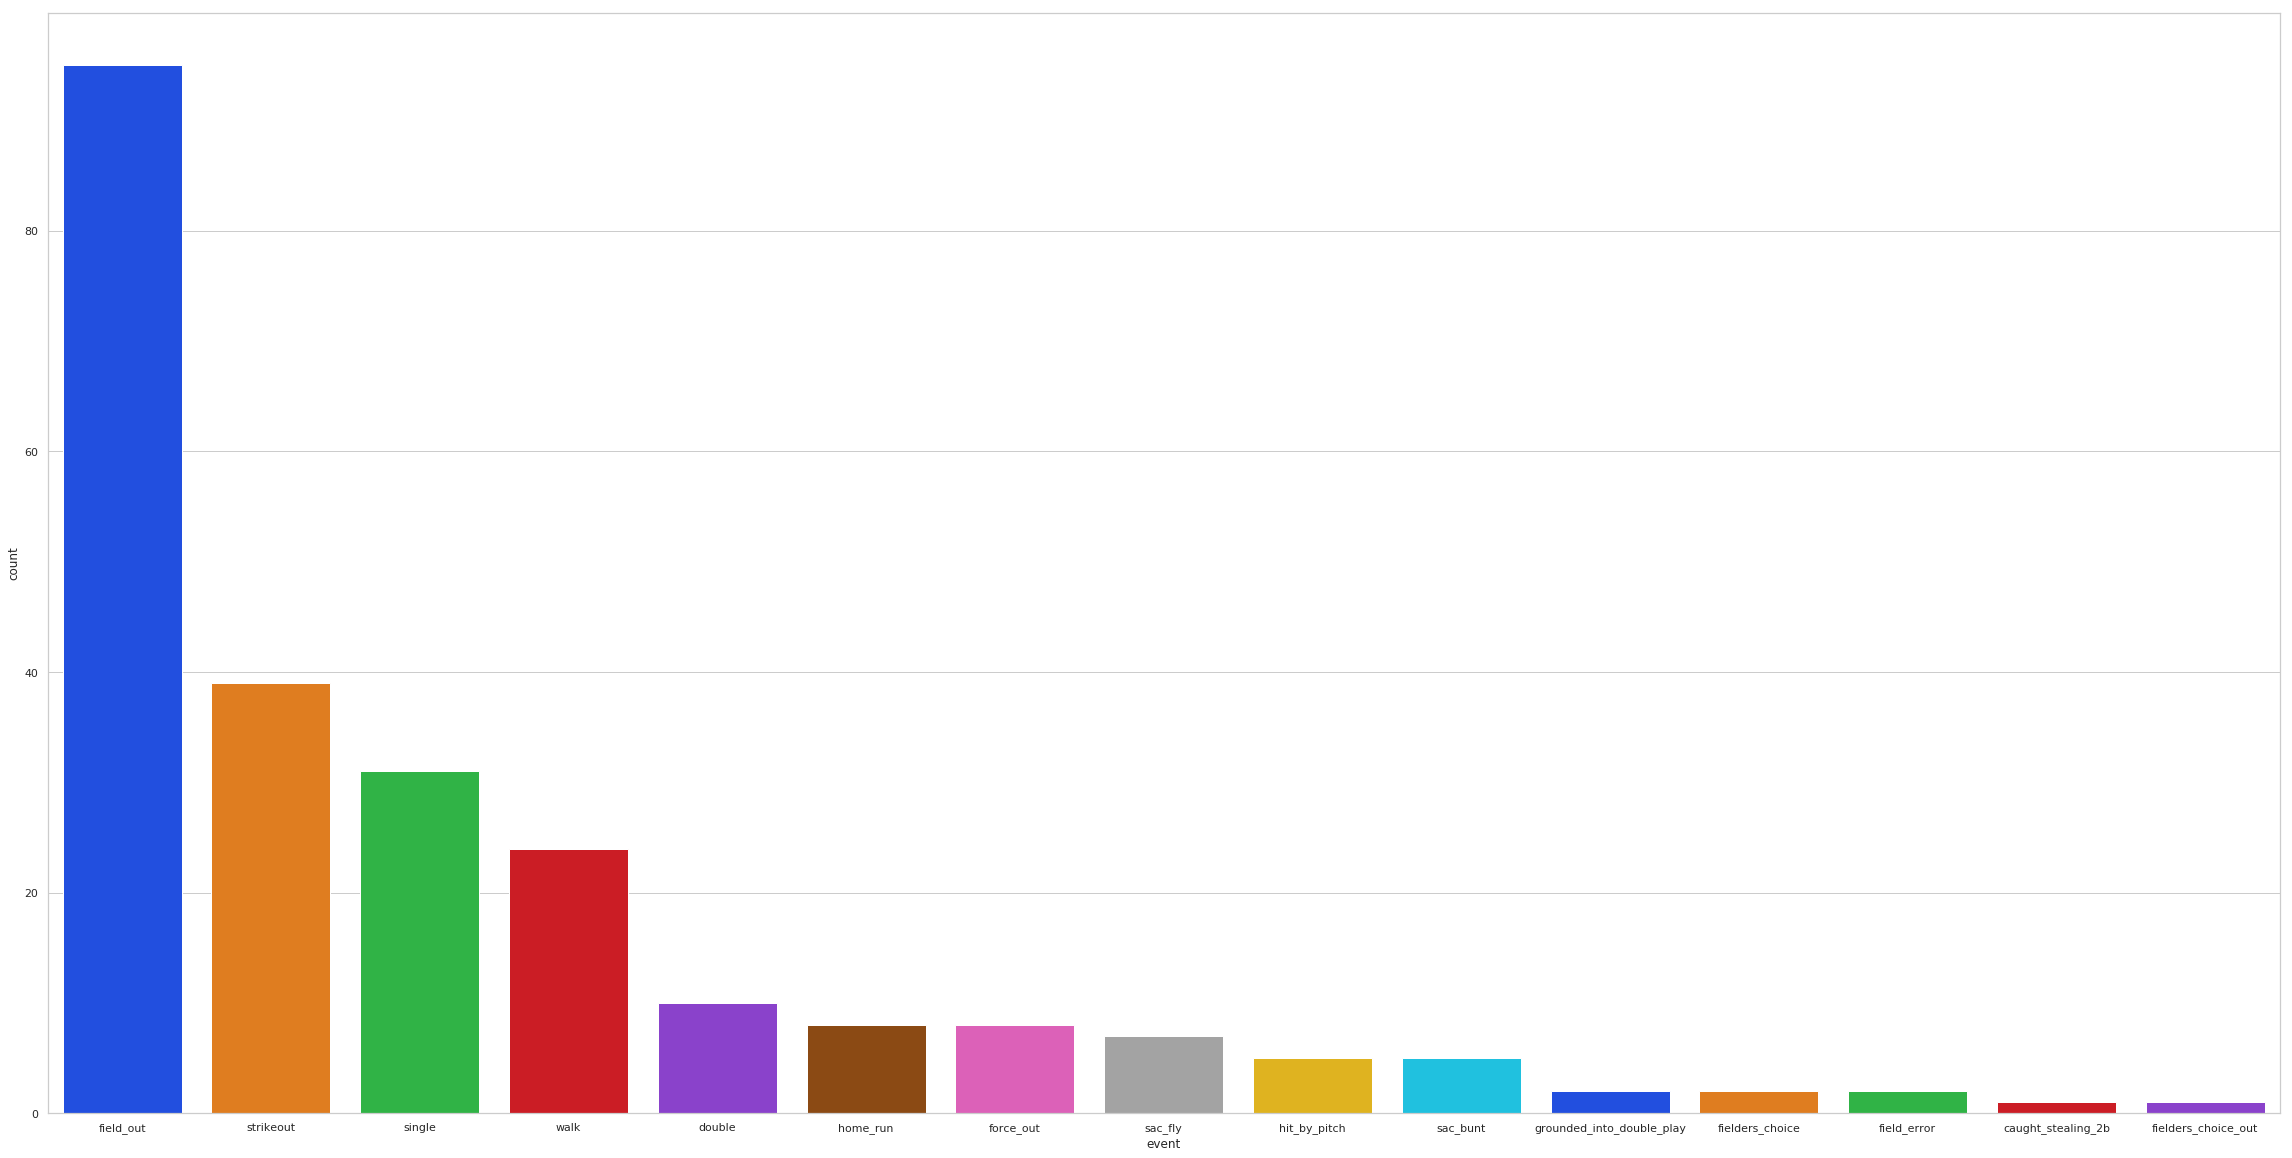

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(40,20.25))
ax = sns.barplot(x="event", y="count", data=player1_risp_outcome[player1_risp_outcome['risp'] == True], palette = 'bright')